<a href="https://colab.research.google.com/github/jhonda18/Python1/blob/main/N5_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 16 sesiones o clases de 2 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Ejercicios de optimización**

Pueden consultar las soluciones [aquí](http://www.daviddelgado.blogsek.es/files/2017/05/Problemas-de-Optimizacion-MAT-1BAT.pdf)



## Dimensiones

### Ejercicio 1
Determinar las dimensiones del rectángulo de área máxima inscrito en un círculo de radio $R = \frac{1}{2}$

<!-- ![](https://es-static.z-dn.net/files/d43/e794512831bf13094afb52eb770bc8e3.png) -->

In [ ]:
#Círculo
#Ecuaciones parametricas
#(x-A)^2 + (y-B)^2 = R^2
# x - A = R^2 - (y - B)^2  
# x = Acos(\theta) 
# y = Bsin(\theta)

theta = np.linspace(0,np.pi*2,360)
A = 0.0
B = 0.0
R = 1.0
x = R*np.cos(theta) + A
y = R*np.sin(theta) + B

In [ ]:
h = 0.25 
y1 = B + h
x1 = np.sqrt(R**2 - (y1-B)**2) + A
x2 = -np.sqrt(R**2 - (y1-B)**2) + A
x1,x2

(0.9682458365518543, -0.9682458365518543)

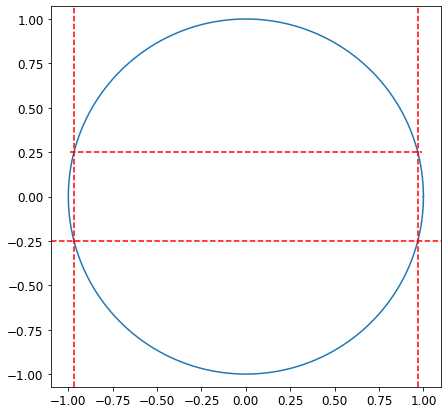

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(x,y)
h = 0.25
plt.axhline(y=B + h, xmin=0.05,xmax=0.95,color="r",linestyle="--")
plt.axhline(y=B - h,color="r",linestyle="--")
plt.axvline(x=x1 ,color="r",linestyle="--")
plt.axvline(x=x2 ,color="r",linestyle="--")
plt.axis("equal")
plt.show()

[Latex](https://es.overleaf.com/)

[Fórmulas](http://metodos.fam.cie.uva.es/~latex/apuntes/apuntes3.pdf)

Área de un rectángulo: $A_{rect} = x * y$

Hipotenusa --> $x^2 + y^2 = 2*R$

y = $\sqrt{2*R - x^2}$

$A_{rect} = x *  \sqrt{2*R - x^2}  $

In [ ]:
def area(x,R):
  return x*np.sqrt(2*R - x**2)

In [ ]:
from scipy.optimize import fmin, minimize

#Función objetivo
def funobj(x,R):
  return -1*area(x,R)



In [ ]:
xmin1 = fmin(funobj,0,args=(0.5,))
xmin1

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 24
         Function evaluations: 48


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


array([0.707125])

In [ ]:
xmin2 = minimize(funobj,0,args=(0.5,),method="CG")
xmin2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


     fun: -0.5
     jac: array([1.86264515e-08])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 4
    njev: 12
  status: 0
 success: True
       x: array([0.70710678])

In [ ]:
#Solución haciendo el proceso a mano
xteo = (2**0.5)/2
xteo

0.7071067811865476

In [ ]:
print(abs(xmin1 - xteo)*100/xteo)

[0.00257653]


In [ ]:
print(abs(xmin2.x - xteo)*100/xteo)

[4.93947178e-07]


In [ ]:
R = 0.5
y = np.sqrt((2*R - xmin2.x**2))
y

array([0.70710678])

## Ejercicio 2

Determinar la mayor área que puede encerrar un triángulo rectángulo cuyo lado mayor mida 1 metro.

## Economía

### Ejercicio 1

Los costes de fabricación, C(x) en euros, de cierta variedad de salchichas, dependen de la cantidad elaborada (x en kilos) de acuerdo con la siguiente expresión:

$$C(x) = 10 + 2x$$

El fabricante estima que el precio de venta en euros de cada kilogramo de salchichas viene dado por:
$$P(x) = 20 - \dfrac{6x^2}{800}$$

Obtener la función de ganancias
¿Qué cantidad de salchichas interesa producir para maximizar ganancias?
Calcular en este caso, el precio de venta y la ganancia que se obtiene.

In [ ]:
#x(kilogramos) por precio(Eur/Kilogramo) por kilogramo de las salchichas

#Precio por kilogramo 
def precio_kilo(x):
  return 20 - 6*x**2/800

def coste(x):
  return 10 + 2*x

# Ganancia = Venta - Coste
def ganancia(x):
  return x*precio_kilo(x) - coste(x)

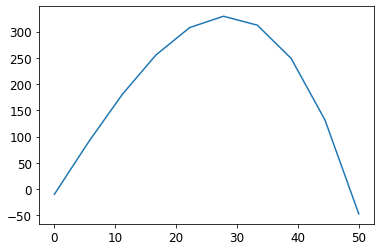

In [ ]:
x = np.linspace(0,50,10)
plt.plot(x, ganancia(x))
plt.show()

In [ ]:
funobj = lambda x: -1*ganancia(x)
xmin = minimize(funobj,0,method="CG")
xmin

     fun: array([-329.41125497])
     jac: array([7.62939453e-06])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([28.28427221])

In [ ]:
xteo = 20*(2)**0.5
xteo

28.284271247461902

In [ ]:
precio_kilo(xmin.x),ganancia(xmin.x)

(array([13.99999959]), array([329.41125497]))

### Ejercicio 2

Una compañía de autobuses interurbanos ha comprobado que el número de viajeros
(N) diarios depende del precio del billete (p) según la expresión:

$$ N(p) = 300 - 6p $$

Dar la expresión que nos proporciona los ingresos diarios (I) de esa compañía en
función del precio del billete.
¿Qué ingreso diario se obtiene si el precio del billete es 15 euros?
¿Cuál es el precio del billete que hace máximo los ingresos diarios?
¿Cuáles son esos ingresos máximos?


# **Ejercicio video**

Pueden ver el desarrollo de este problema en el [link](http://www.secmca.org/nota/python-para-economistas/)

Un modelo de Cournot con 2 empresas. Suponga que el mercado de un producto está dominado por dos empresas que compiten entre sí. Para este duopolio, la inversa de la función de demanda está dada por:

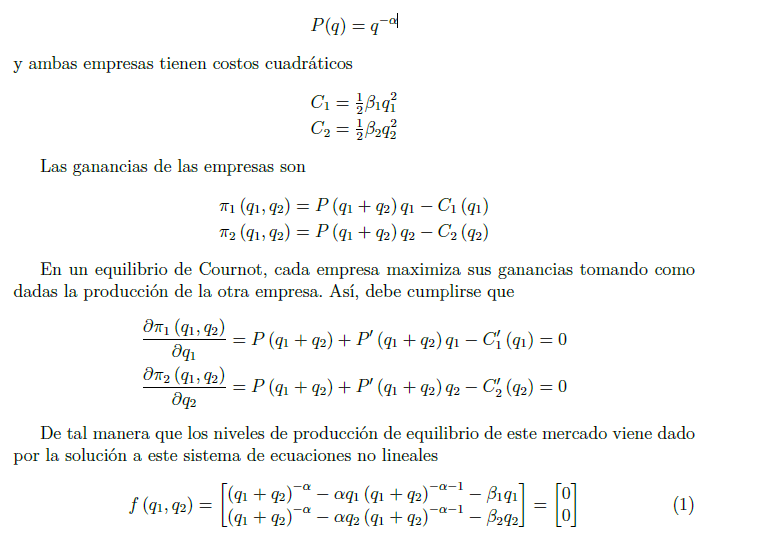



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install compecon

     |████████████████████████████████| 174kB 3.4MB/s 
     |████████████████████████████████| 163kB 10.7MB/s 


In [ ]:
#@title Parámetros iniciales
alpha = 0.625 #@param {type:"slider", min:0, max:1, step:0.001}
beta1 = 0.6 #@param {type:"slider", min:0, max:1, step:0.001}
beta2 = 0.8 #@param {type:"slider", min:0, max:1, step:0.001}
beta = np.array([beta1,beta2])

In [ ]:
def market(q, alpha = 0.625):
  quantity = q.sum()
  price = quantity**(-alpha)
  return price, quantity


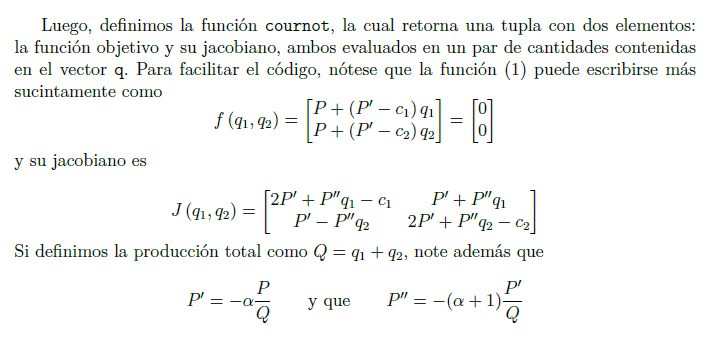

In [ ]:
np.diag(beta)

array([[0.6, 0. ],
       [0. , 0.8]])

In [ ]:
np.fliplr(np.diag(beta))

array([[0. , 0.6],
       [0.8, 0. ]])

In [ ]:
#Se pueden llamar variables desde las funciones siempre que estén definidas en el principal
def cournot(q):
  P, Q = market(q)
  P1 = -alpha * P / Q
  P2 = (-alpha - 1) * P1 / Q
  fval = P + (P1 - beta) * q
  fjac = np.diag(2 * P1 + P2*q - beta) + np.fliplr(np.diag(P1 + P2*q)) 
  return fval, fjac

In [ ]:
cournot(np.array([1,3]))

(array([-0.24524682, -2.17663689]), array([[-0.70470146, -0.09238364],
        [-0.14576085, -0.85132424]]))

In [ ]:
q = np.array([0.2,0.2])
q_hist = []
for it in range(40):
  f,J = cournot(q)
  step = -np.linalg.solve(J,f)
  print(q)
  q_hist.append(q.copy())
  q +=step
  if np.linalg.norm(step) < 1.e-10: break

[0.2 0.2]
[0.4522 0.4269]
[0.7444 0.638 ]
[0.836  0.6874]
[0.8396 0.6888]
[0.8396 0.6888]


In [ ]:
price, quantity = market(q)

In [ ]:
print(f'\nCompany 1 produces {q[0]:.4f} units, while' +
f' company 2 produces {q[1]:.4f} units.')


Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.


In [ ]:
print(f'Total production is {quantity:.4f} and price is {price:.4f}')

Total production is 1.5284 and price is 0.7671


In [ ]:
from scipy.optimize import newton, nonlin, newton_krylov, root   

In [ ]:
q0 = np.array([0.2,0.2])

In [ ]:
sol=root(cournot,q0,jac=True,callback=lambda x,f:print(x,f))

In [ ]:
market(sol.x)

(0.767111059673739, 1.5283640346996)

In [ ]:
from compecon import NLP, gridmake
n = 100
q1 = np.linspace(0.1, 1.5, n)
q2 = np.linspace(0.1, 1.5, n)
z = np.array([cournot(q)[0] for q in gridmake(q1, q2).T]).T

In [ ]:
steps_options = {'marker': 'o',
'color': (0.2, 0.2, .81),
'linewidth': 2.5,
'markersize': 9,
'markerfacecolor': 'white',
'markeredgecolor': 'red'}

contour_options = {'levels': [0.0],
'colors': 'white',
'linewidths': 2.0}

In [ ]:
Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')

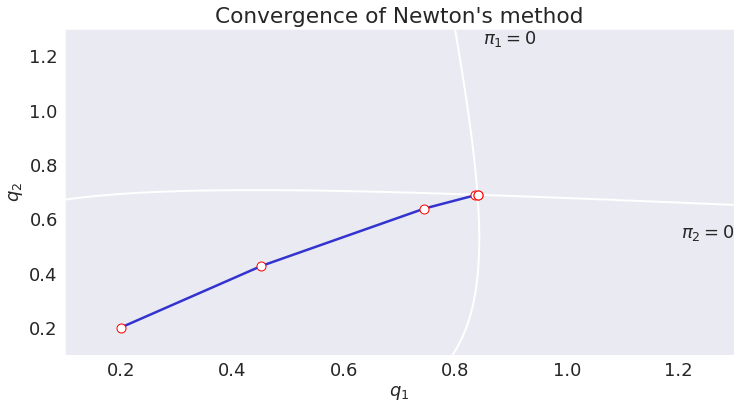

In [ ]:
from compecon.demos import demo

q0 = np.array([0.2, 0.2])
cournot_problem = NLP(cournot)
q = cournot_problem.newton(q0)

methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True
qmin, qmax = 0.1, 1.3
x = cournot_problem.zero(method='newton')
demo.figure("Convergence of Newton's method", '$q_1$', '$q_2$',
[qmin, qmax], [qmin, qmax])
plt.contour(Q1, Q2, Z0, **contour_options)
plt.contour(Q1, Q2, Z1, **contour_options)
plt.plot(*cournot_problem.x_sequence, **steps_options)
demo.text(0.85, qmax, '$\pi_1 = 0$', 'left', 'top')
demo.text(qmax, 0.55, '$\pi_2 = 0$', 'right', 'center')

In [ ]:
q_hist

[array([0.2, 0.2]),
 array([0.4522, 0.4269]),
 array([0.7444, 0.638 ]),
 array([0.836 , 0.6874]),
 array([0.8396, 0.6888]),
 array([0.8396, 0.6888])]

In [ ]:
p_hist= np.array([cournot(q)[0] for q in q_hist])
fobj =np.linalg.norm(p_hist, axis = 1)

In [ ]:
Q=np.array(q_hist)

array([0.2   , 0.4522, 0.7444, 0.836 , 0.8396, 0.8396])

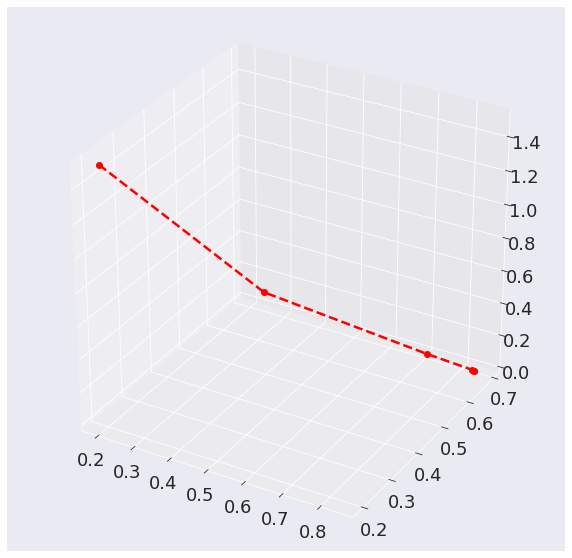

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x=Q[:,0]
y=Q[:,1]
z = fobj
ax.plot(x, y, z,marker='o',linestyle='--',color='r')

plt.show()